# DICE 2013R (Rocky Road flavour)

This notebook compares DICE.jl to the `DICE2013_032813.gms` GAMS file and Includes directory.

In [1]:
# For Solving #
using DICE;

# For Comparing with GAMS data
using NBInclude;
@nbinclude("../GAMS/GAMS_Compare.ipynb")

# For Additional Plots
# using Plots

version = v2013R(RockyRoad)

v2013R (Rocky Road flavour)

## Base Price Scenario

Similar to the Vanilla version of 2013R, a base and optimal price scenario exist.

We will quickly compare them, as they should mimic the Vanilla version.

In [2]:
base = solve(BasePrice, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3912
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1544
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      178
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Base (current policy) carbon price scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 17 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 714 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 297 constraints
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [3]:
params = loadGAMSResults(version, BasePrice);

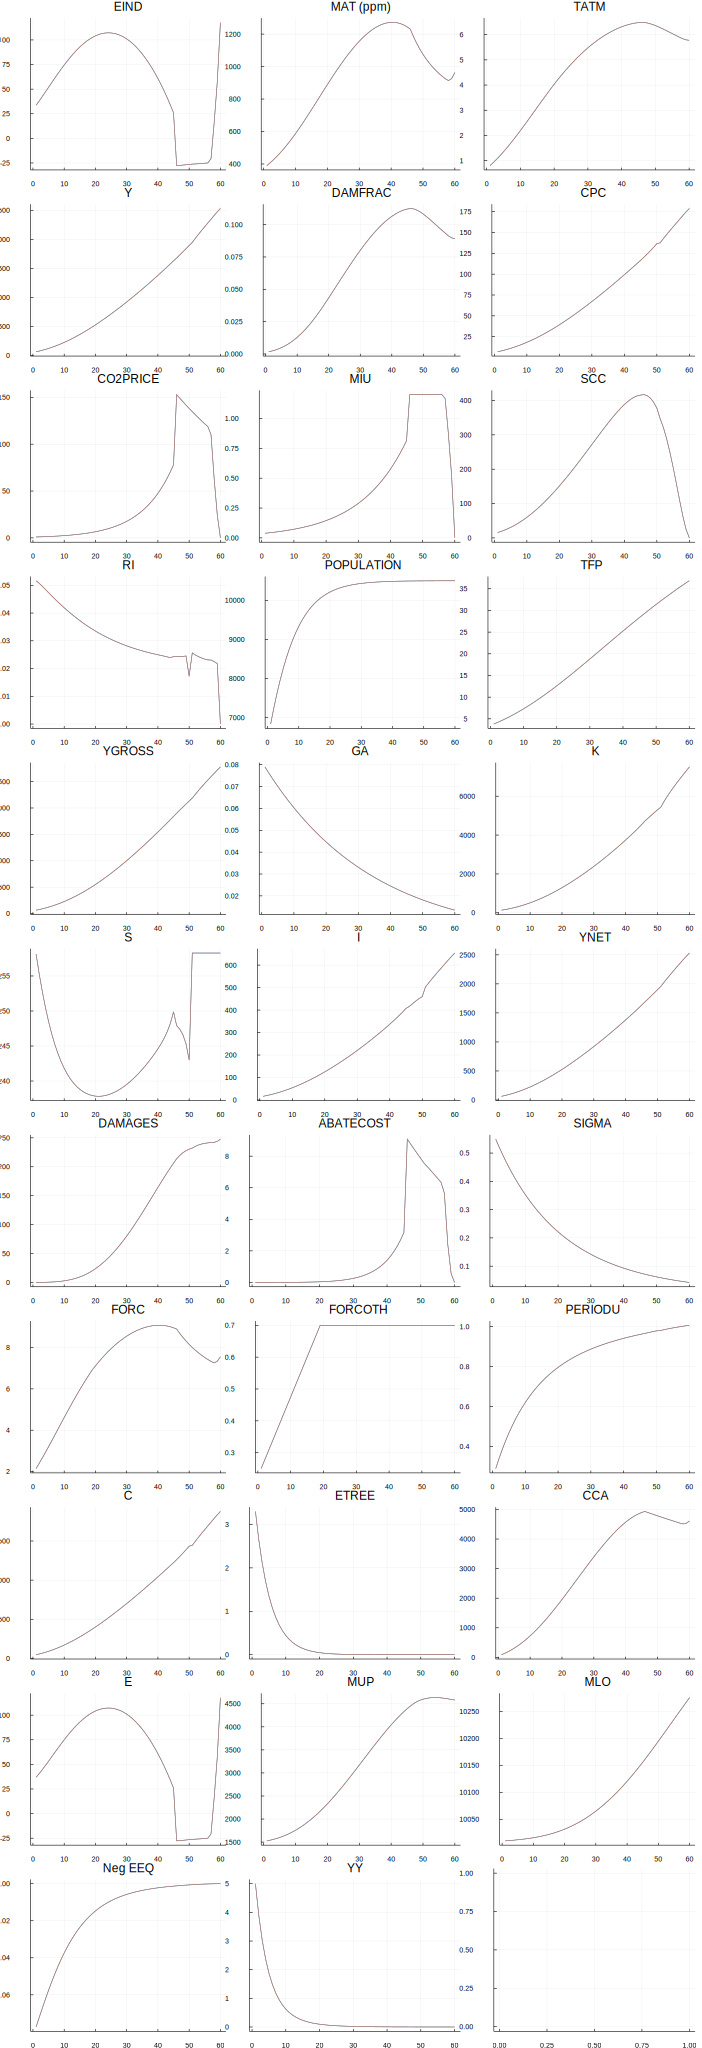

In [4]:
plotComparison(base, params)

CONOPT Utility = `2668.2118865871`

In [5]:
base.results.UTILITY

2668.211875057513

# Optimal Price Scenario

In [6]:
opt = solve(OptimalPrice, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3912
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1544
                     variables with only lower bounds:      595
                variables with lower and upper bounds:      119
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Optimal carbon price scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 17 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 714 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 238 constraints
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [7]:
oparams = loadGAMSResults(version, OptimalPrice);

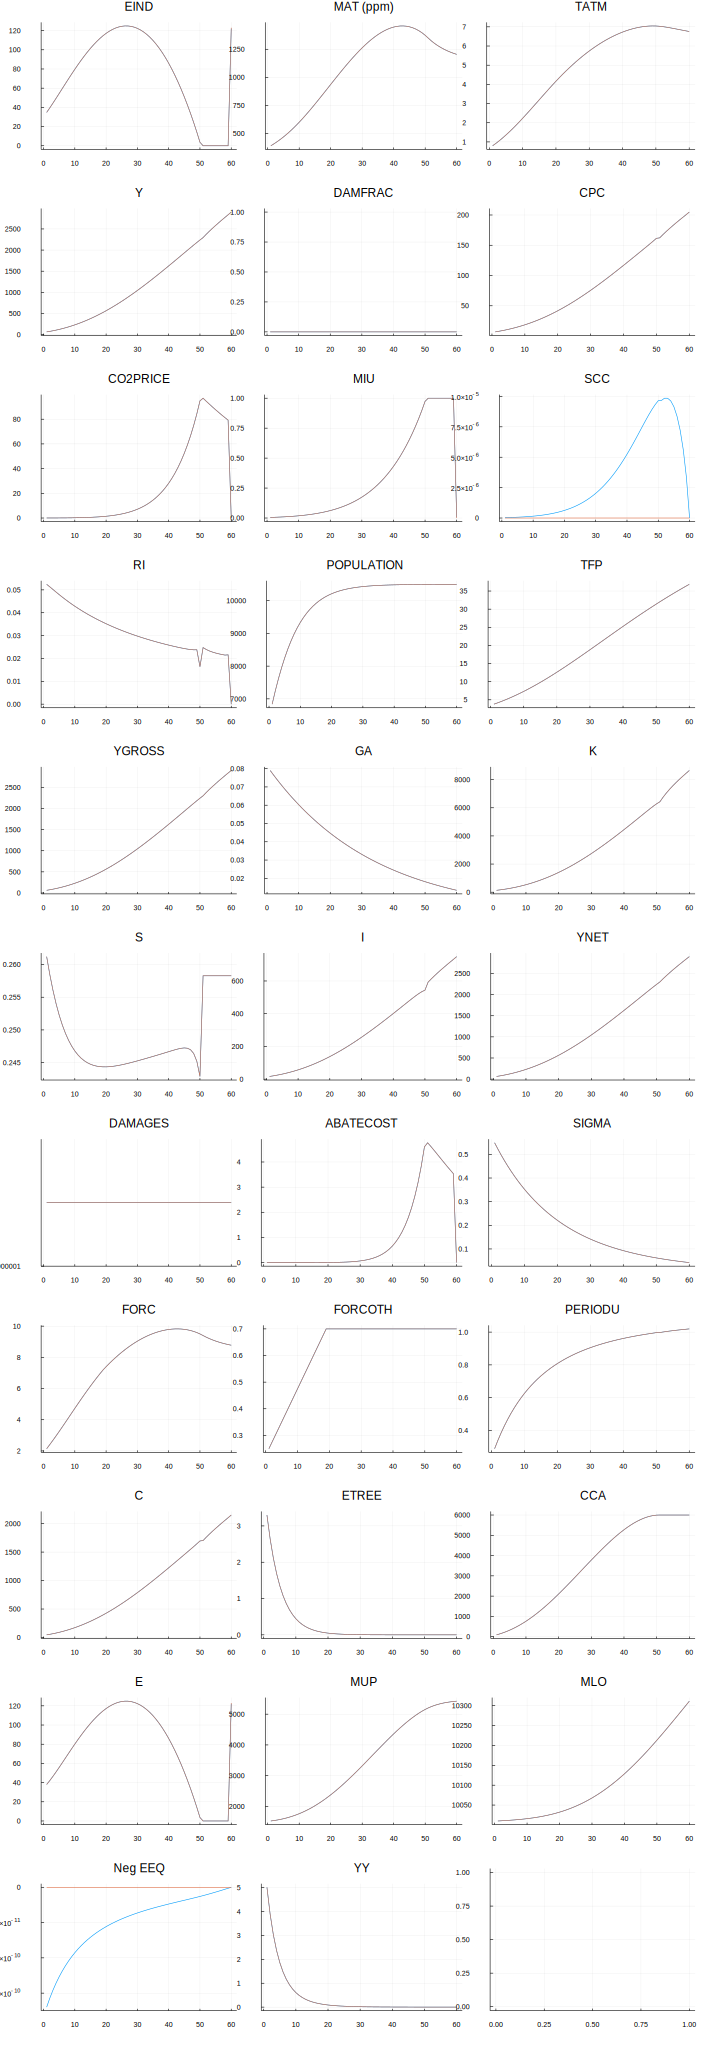

In [8]:
plotComparison(opt, oparams)

We see that in the GAMS version, our SCC is zero&mdash;whereas the DICE.jl version has some small value. This comes about from precision difference: GAMS is using 32bit floats, DICE.jl is using 64bit ones. In addition to this, results are truncated to ten decimals and don't use scientific notation.


CONOPT Utility = `2741.2318406380`

In [9]:
opt.results.UTILITY

2741.2318405178044

# Limit 2 Degrees Scenario

From here, we are getting into the more unique scenarios of the Rocky Road version, but their analysis needs to be no different.

In [10]:
# This one spools forever currently. Not advisable to run this section at the moment.
#lim2 = solve(Limit2Degrees, version)

In [11]:
#l2params = loadGAMSResults(version, Limit2Degrees);

In [12]:
#plotComparison(lim2, l2params)

# Stern Scenario

**NOTE:** There is a bug in the GAMS version, which means the `optlrsav` value is not updated in the savings calculation and therefore doesn't actually return the correct Stern scenario.

This comparison is run against a patched version: [d2013RRR_Stern.gms](../GAMS/d2013RRR_Stern.gms), which fixes this issue.

All differences noted in the graphs below are underneath rounding error.

In [13]:
stern = solve(Stern, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3912
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      944

Total number of variables............................:     1544
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      178
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Stern scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 17 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 714 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 297 constraints
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [14]:
sparams = loadGAMSResults(version, Stern);

┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/35TGG/src/ticks.jl:173
┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/35TGG/src/ticks.jl:173


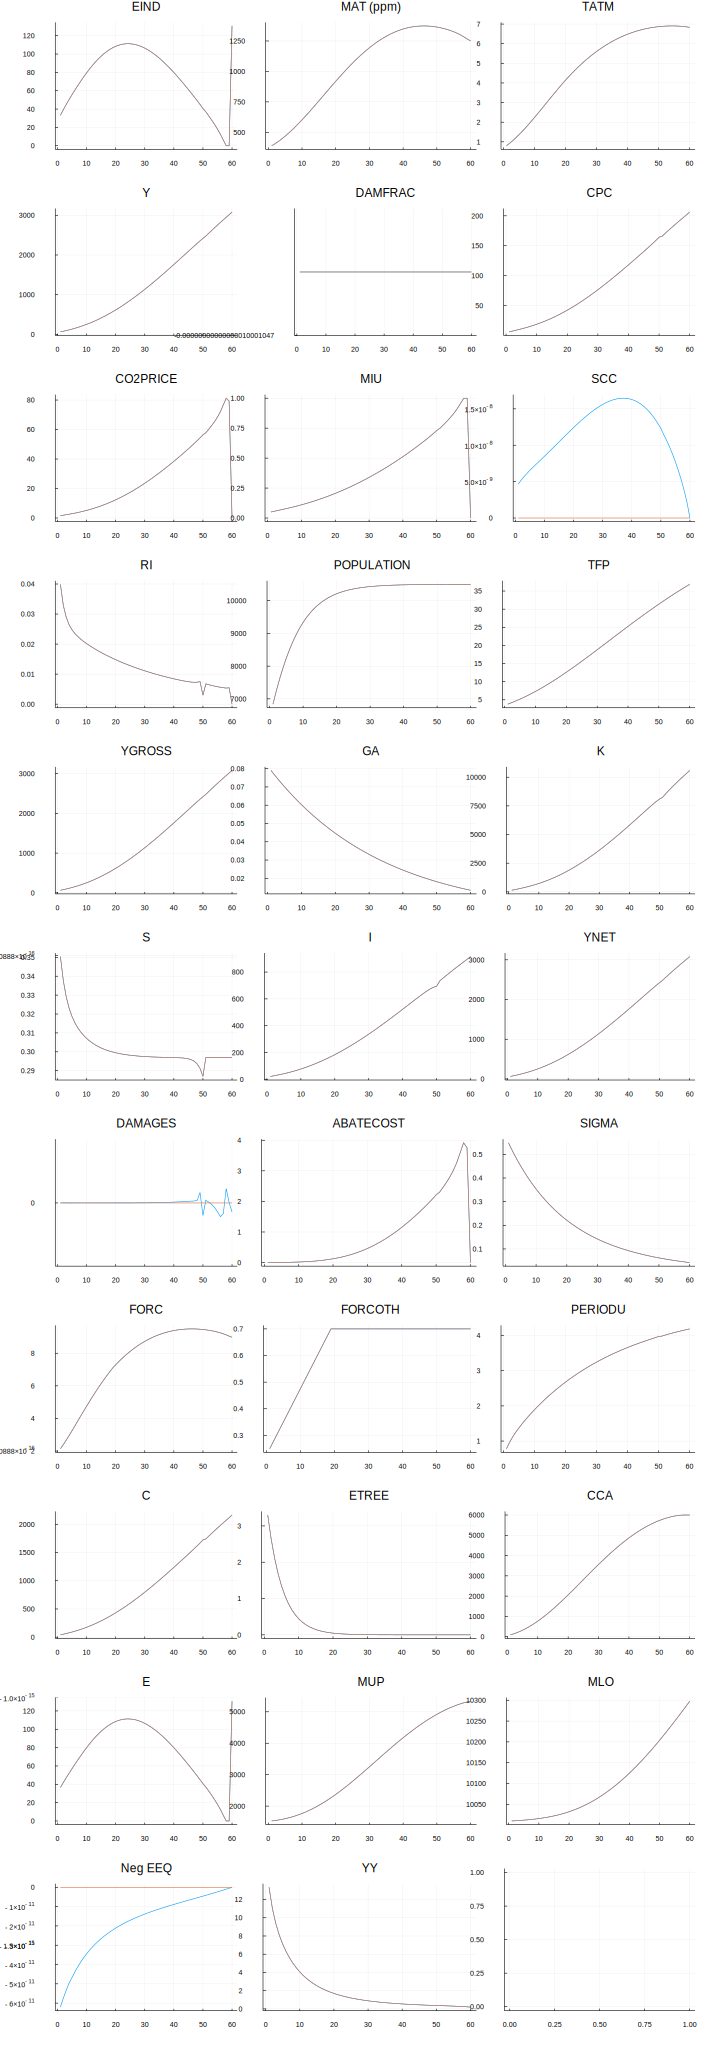

┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/35TGG/src/ticks.jl:173
┌ Warning: No strict ticks found
└ @ PlotUtils /home/tim/.julia/packages/PlotUtils/35TGG/src/ticks.jl:173


In [15]:
plotComparison(stern, sparams)

CONOPT Utility = `124305.6025535197`

In [16]:
stern.results.UTILITY

124305.60255442385

# Stern Calibrated Scenario

**NOTE:** There is a bug in the GAMS version, which means the `optlrsav` value is not updated in the savings calculation and therefore doesn't actually return the correct Stern scenario.

This comparison is run against a patched version: [d2013RRR_SternCalibrated.gms](../GAMS/d2013RRR_SternCalibrated.gms), which fixes this issue.

In [17]:
sterncal = solve(SternCalibrated, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3908
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      939

Total number of variables............................:     1543
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      177
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Calibrated Stern scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 18 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 713 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 296 constraints
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [18]:
scparams = loadGAMSResults(version, SternCalibrated);

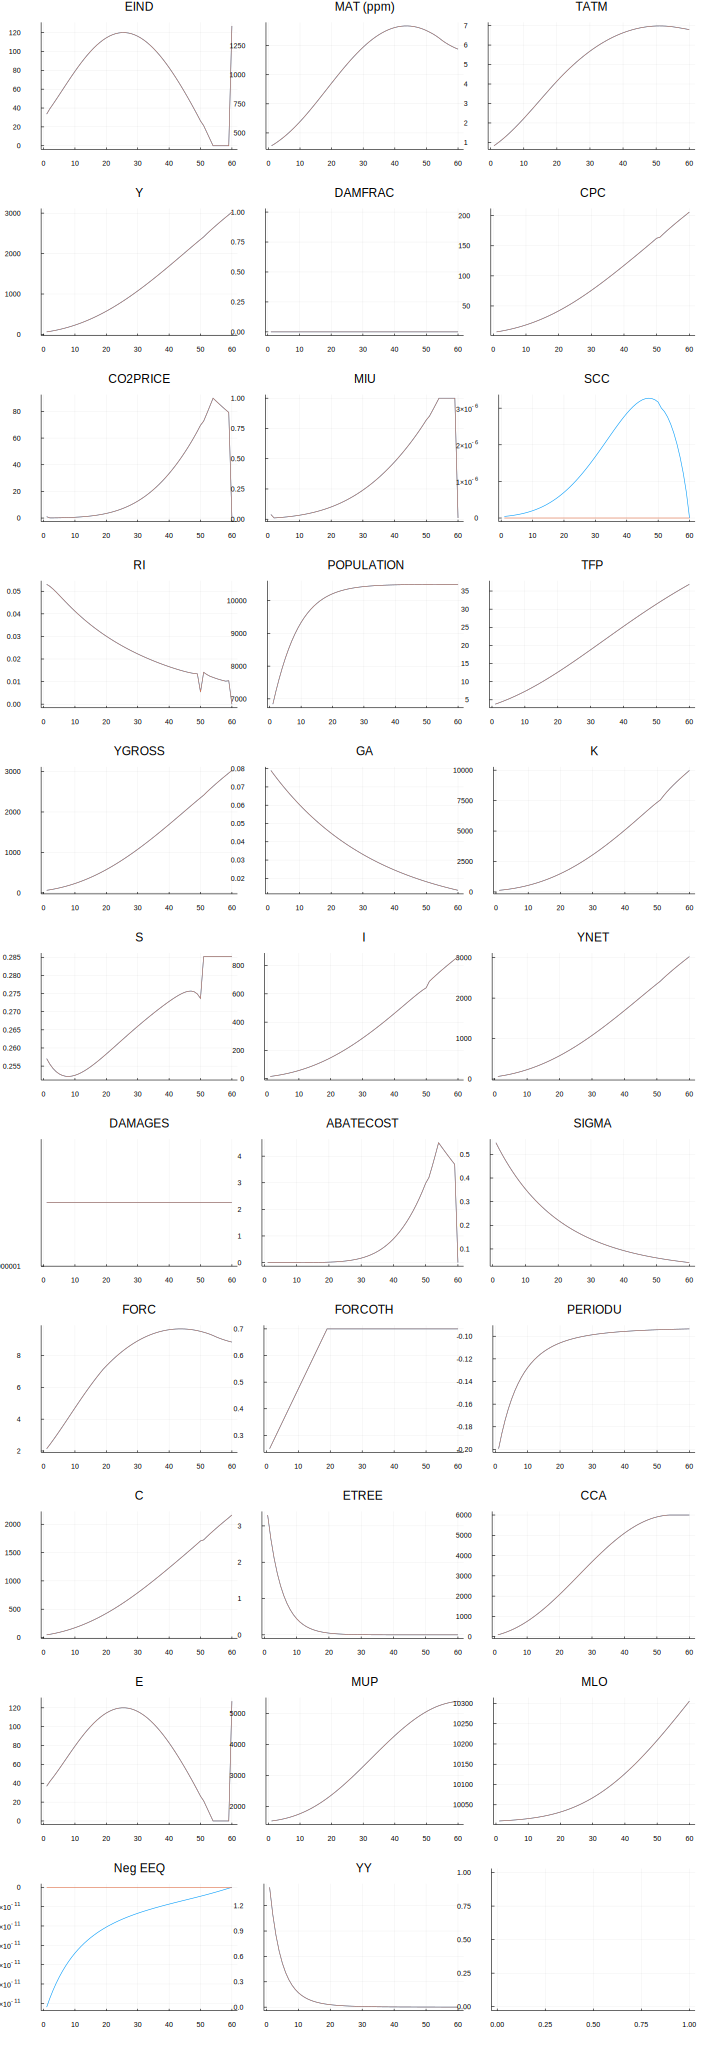

In [19]:
plotComparison(sterncal, scparams)

CONOPT Utility = `-8469.0058598350`

In [20]:
sterncal.results.UTILITY

-8469.005859877701

# Copenhagen Scenario

In [21]:
cop = solve(Copenhagen, version)

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3672
Number of nonzeros in inequality constraint Jacobian.:      176
Number of nonzeros in Lagrangian Hessian.............:      644

Total number of variables............................:     1484
                     variables with only lower bounds:      536
                variables with lower and upper bounds:      118
                     variables with only upper bounds:       59
Total number of equality constraints.................:     1374
Total number of inequality constraints...............:       59
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       59

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Copenhagen participation scenario using v2013R (Rocky Road flavour).
A JuMP Model
Maximization problem with:
Variables: 1561
Objective function type: JuMP.VariableRef
`JuMP.VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 77 constraints
`JuMP.VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 654 constraints
`JuMP.VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 237 constraints
`JuMP.GenericAffExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 655 constraints
`JuMP.GenericQuadExpr{Float64,JuMP.VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 240 constraints
Nonlinear: 538 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.
Names registered in the model: C, CCA, CEMUTOTPER, CPC, CPRICE, DAMAGES, E, Eind, FORC, I, K, MCABATE, Mᵤₚ, Mₐₜ, Mₗₒ, PERIODU, RI, S, Tₐₜ, Tₗₒ, UTILITY, Y, YGROSS, YNET, Λ, Ω, μ

In [22]:
copparams = loadGAMSResults(version, Copenhagen);

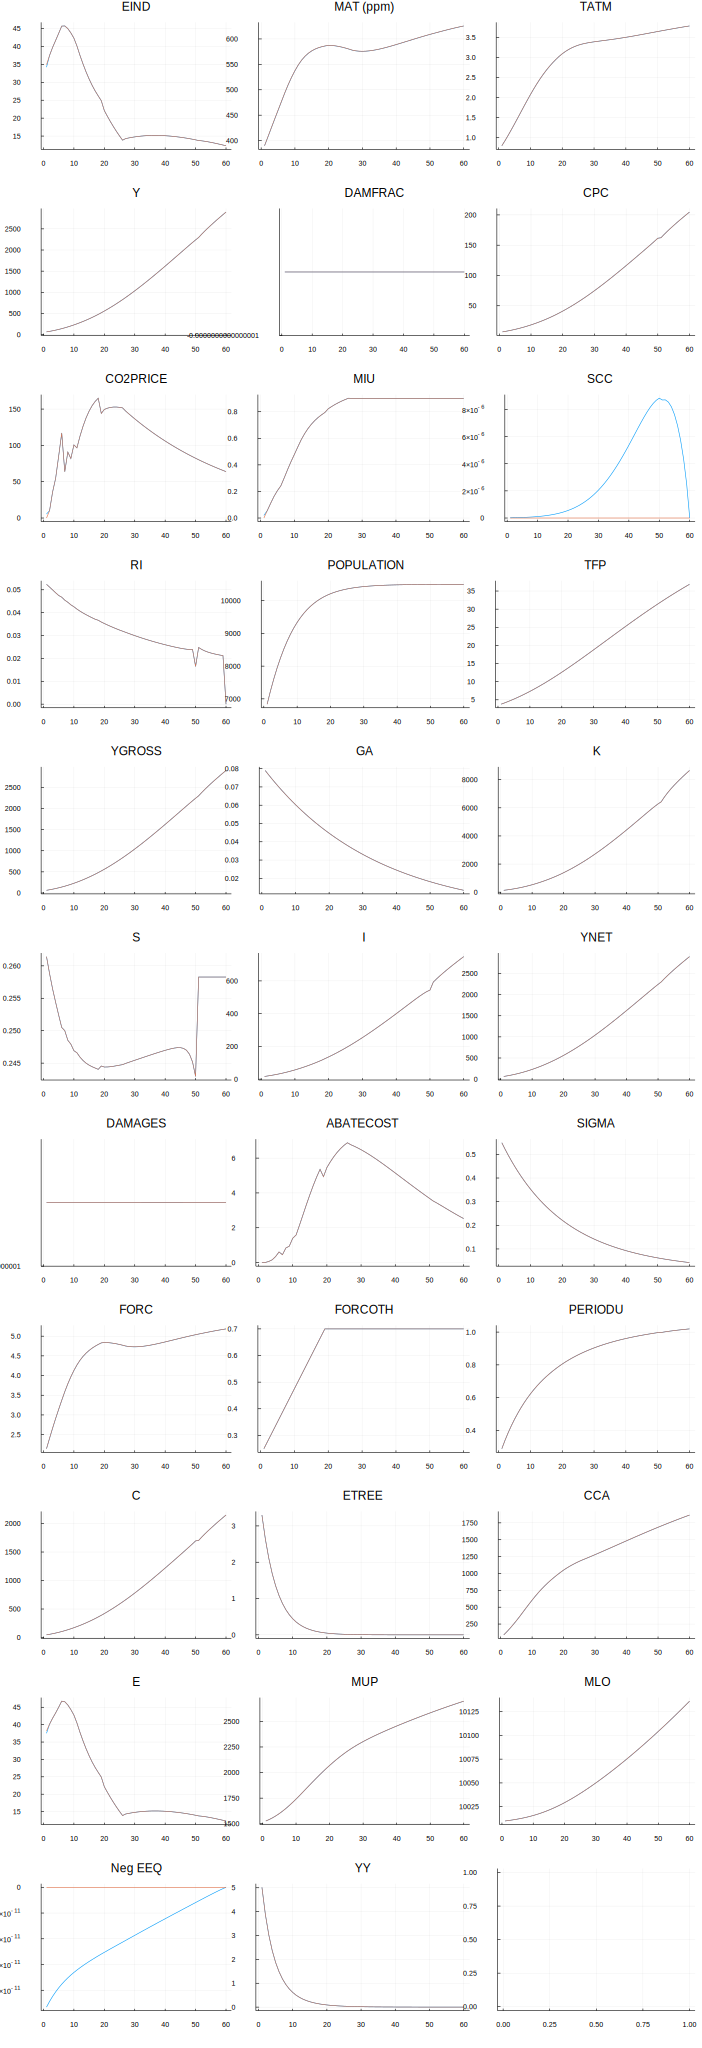

In [23]:
plotComparison(cop, copparams)

CONOPT Objective = `2725.4226463611`

In [24]:
cop.results.UTILITY

2725.4158209964135